# Building Unimodal Text Modal

In [18]:
cd ..

e:\notebooks


In [19]:
#ensuring that any edits to libraries you make are reloaded here automatically
#to ensuere charts or images displayed are shown in this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [20]:
#importing required modules
from exp.Required_Modules_And_Packages import *
from exp.Data_Reading_And_Preprocessing import *
from exp.Required_Integration_Functionalities_For_Transformer_To_Fastai import *
from exp.Required_Functionalities_To_Handal_Multimodal_Dataset import *
from exp.Multimodal_Model_With_Intermediate_Or_EmbraceNet_Fusion import *

In [21]:
path = Path('/notebooks/MultimodalTweetsClassification')
# path.ls()

In [22]:
path_img = path/'data_image'

In [23]:
# Uncomment the code if dataset and labels are in .tar.gz and .zip format respectively

# data = "CrisisMMD_v2.tar.gz"
# agreed_label = "crisismmd_datasplit_agreed_label.zip"
# untar_data_and_unzip_label(data,agreed_label)

In [24]:
#reading csv files and doing initial necessary processing
data_human_text,test_data_human_text = get_dataframe(*get_tsv_data_files('humanitarian_task_tsv_files'),path)

reading data and preprocessing it.....
done!!


In [ ]:
print(f"shape of data: {data_human_text.shape}\n")
print(f"train set: {data_human_text['is_valid'].value_counts()[0]}")
print(f"valid set: {data_human_text['is_valid'].value_counts()[1]}")      
print("="*50)
print(f"shape of test data: {test_data_human_text.shape}\n")

shape of data: (15845, 10)

train set: 13608
valid set: 2237
shape of test data: (2237, 9)



In [ ]:
data_human_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid
0,california_wildfires,917791291823591425,917791291823591425_1,pls share were capturing wildfire response rec...,data_image/california_wildfires/10_10_2017/917...,not_humanitarian,other_relevant_information,not_humanitarian,Negative,False
1,california_wildfires,917791291823591425,917791291823591425_0,pls share were capturing wildfire response rec...,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,infrastructure_and_utility_damage,Negative,False
2,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False
3,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False
4,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False


In [27]:
test_data_human_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image
0,hurricane_harvey,905952332923338752,905952332923338752_0,has great event tomorrow for both byu and utah...,data_image/hurricane_harvey/8_9_2017/905952332...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,Positive
1,mexico_earthquake,912022130396672000,912022130396672000_0,now also carlo surf band at pm pwyc mexicoeart...,data_image/mexico_earthquake/24_9_2017/9120221...,not_humanitarian,not_humanitarian,not_humanitarian,Positive
2,mexico_earthquake,910700764808564736,910700764808564736_0,earthquake in mexico rocks ph embassy no filip...,data_image/mexico_earthquake/21_9_2017/9107007...,infrastructure_and_utility_damage,other_relevant_information,infrastructure_and_utility_damage,Negative
3,hurricane_maria,927758858776465408,927758858776465408_0,guaynabo resident efrain diaz stands by bridge...,data_image/hurricane_maria/7_11_2017/927758858...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive
4,hurricane_harvey,907654309587779584,907654309587779584_0,after harvey irma leaves its own trail of dest...,data_image/hurricane_harvey/12_9_2017/90765430...,other_relevant_information,other_relevant_information,other_relevant_information,Positive


In [28]:
# preparing data for language model to get encoder and word embedding vocab for text classification model
data_lm = get_text_data_for_language_model(data_human_text,path)

In [29]:
data_lm

TextLMDataBunch;

Train: LabelList (13608 items)
x: LMTextList
xxbos pls share were capturing wildfire response recovery info here,xxbos pls share were capturing wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews
y: LMLabelList
,,,,
Path: \notebooks\MultimodalTweetsClassification;

Valid: LabelList (2237 items)
x: LMTextList
xxbos hurricane maria refugees arrive in new jersey dogs amp cats xxunk new homes,xxbos xxunk launches emergency appeal to help xxunk people in sri lanka humanitarian newzealand auckland,xxbos the xxunk xxunk response to hurricane maria xxunk xxunk after katrina,xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos hurricane irma on twitter
y: LMLabelList
,,,,
Path: \notebooks\MultimodalTweetsClassification;

Test: None

In [30]:
# showing the data with corresponding annotations
data_lm.show_batch()

idx,text
0,worse in the fall xxbos why california wildfires are worse in the fall xxbos why california wildfires are worse in the fall xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting
1,teknaf xxbos mora leaves trail of destruction across teknaf xxbos mora staff sending off their xxunk thank you for all of your service to our students xxunk xxbos mora staff sending off their xxunk thank you for all of your service to our students xxunk xxbos cleaning wells in flood affected areas of praduwa southern province srilanka xxbos cleaning wells in flood affected areas of praduwa southern province srilanka xxbos
2,his stint in saasiral simar ka his character and mora a a a a xxbos mabel mora says see you soon to seven years full of nice moments thank you very much mabel xxbos mabel mora says see you soon to seven years full of nice moments thank you very much mabel xxbos mabel mora says see you soon to seven years full of nice moments thank you very much
3,xxbos mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos please help support and share lasvegasshooting mexicoearthquake puertoricoselevanta xxbos please help support and share lasvegasshooting mexicoearthquake puertoricoselevanta xxbos please help support
4,the wrong chat dead harvey xxunk xxunk xxbos currently stuck on monroe my truck hurricaneharvey xxbos currently stuck on monroe my truck hurricaneharvey xxbos hurricaneharvey almost up to my door xxbos hurricaneharvey almost up to my door xxbos hurricaneharvey almost up to my door xxbos hurricaneharvey almost up to my door xxbos really thought ciara story was gon be something about hurricane harvey but it was really just xxbos really


In [31]:
# importing pretrained AWD_LSTM model and making learner object consist of data,model for training
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [32]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


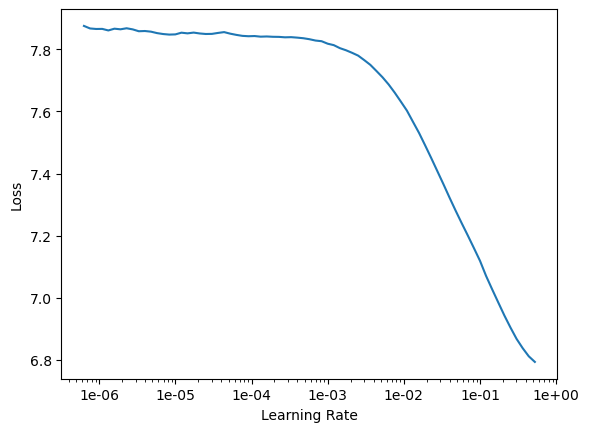

In [33]:
learn_lm.recorder.plot(skip_end=15)

In [34]:
learn_lm.fit_one_cycle(2,3e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.787063,4.883960,0.224075,04:06
1,4.835738,4.780669,0.232462,04:18


In [35]:
learn_lm.unfreeze()

In [36]:
learn_lm.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.679069,4.713322,0.247608,04:32


In [37]:
# saving encoder for using it in classification model
learn_lm.save_encoder('fine_tuned_enc_human')

In [38]:
# preprocessing and creating databunch object for data(train and dev split) and test data(test split)
data_clas = get_text_data(data_human_text,path,vocab=data_lm.vocab)
test_data_clas = get_test_text_data(test_data_human_text,path,vocab=data_lm.vocab)

In [39]:
# making single databunch object of data and test data
data_clas.add_test(test_data_clas.train_ds)
data_clas.test_ds.y = test_data_clas.train_ds.y

In [40]:
data_clas

TextClasDataBunch;

Train: LabelList (13608 items)
x: TextList
xxbos pls share were capturing wildfire response recovery info here,xxbos pls share were capturing wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews
y: CategoryList
other_relevant_information,other_relevant_information,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage
Path: \notebooks\MultimodalTweetsClassification;

Valid: LabelList (2237 items)
x: TextList
xxbos hurricane maria refugees arrive in new jersey dogs amp cats xxunk new homes,xxbos xxunk launches emergency appeal to help xxunk people in sri lanka humanitarian newzealand auckland,xxbos the xxunk xxunk response to hurricane maria xxunk xxunk after katrina,xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos

In [41]:
# showing data with labels
data_clas.show_batch()

text,target
xxbos ya ll be sure to get in on this week xxunk ve got to know what you think you know in case need to know,not_humanitarian
xxbos update on my mom in dr and maria same path as irma eye bit to her north should be strong winds some rain but,not_humanitarian
xxbos we did the mickey not so scary halloween at magic kingdom last night it was fun after irma we needed to do so,not_humanitarian
xxbos new day new week quick look back at lot of hard work by the dedicated team at cbs miami crash course in team,not_humanitarian
xxbos if xxunk would like to xxunk this sweet boy hit me up he was rescued during irma and is about month old loves,rescue_volunteering_or_donation_effort


In [42]:
# importing pretrained AWD-LSTM model and making learner object consist of data,model,metrics and callbacks for training

learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,metrics=[accuracy,Precision1(average='macro'),
                Precision1(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=3),
               partial(ReduceLROnPlateauCallback,monitor='accuracy', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)]
            )

In [43]:
# laoding encoder for classification
learn_clas.load_encoder('fine_tuned_enc_human')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (13608 items)
x: TextList
xxbos pls share were capturing wildfire response recovery info here,xxbos pls share were capturing wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews
y: CategoryList
other_relevant_information,other_relevant_information,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage
Path: \notebooks\MultimodalTweetsClassification;

Valid: LabelList (2237 items)
x: TextList
xxbos hurricane maria refugees arrive in new jersey dogs amp cats xxunk new homes,xxbos xxunk launches emergency appeal to help xxunk people in sri lanka humanitarian newzealand auckland,xxbos the xxunk xxunk response to hurricane maria xxunk xxunk after katrina,xxbos family xxunk finds dog they lost when escaping california

In [44]:
learn_clas.lr_find()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


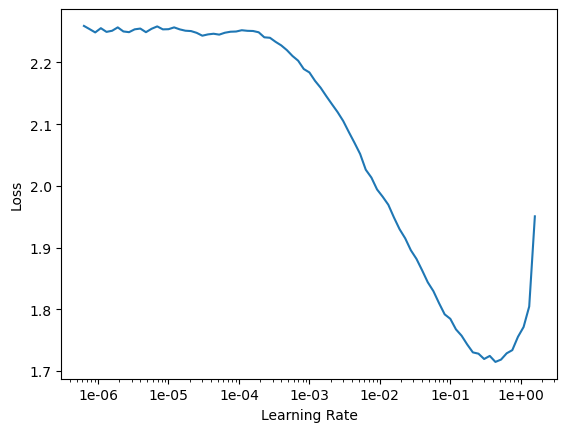

In [45]:
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,1.152881,1.012146,0.614662,0.416335,0.604141,0.338068,0.614663,0.359797,0.602276,06:20
1,0.990042,0.951950,0.638355,0.418023,0.627710,0.387454,0.638355,0.393981,0.626099,06:26
2,0.916518,0.941565,0.637461,0.437822,0.625721,0.385976,0.637461,0.400541,0.625456,06:25


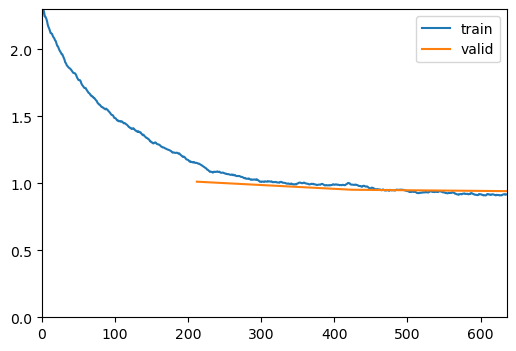

In [46]:
# training the model's top layer's keeping keep other layer's in freezing mode, all the metrics shown here, have been
# evaluted on validation set
learn_clas.fit_one_cycle(3,5e-3,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.911662,0.902300,0.662047,0.455624,0.650542,0.408865,0.662047,0.421887,0.650116,07:06


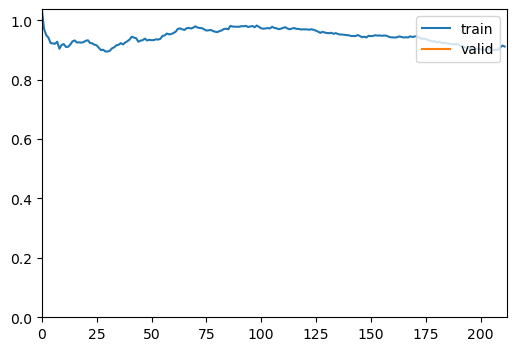

In [47]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.798595,0.861466,0.675011,0.484328,0.667425,0.433714,0.675011,0.448866,0.665005,07:09


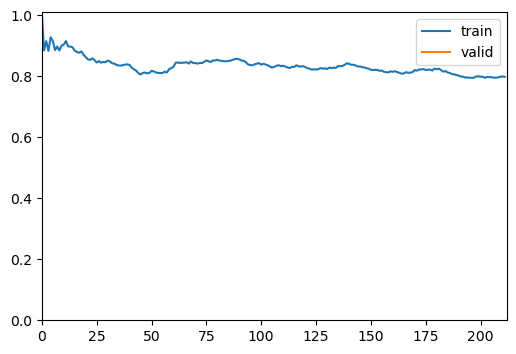

In [48]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.709833,0.860766,0.673223,0.478388,0.666994,0.432712,0.673223,0.446795,0.663534,07:47
1,0.679198,0.856949,0.679928,0.486365,0.673475,0.445736,0.679928,0.459434,0.672568,06:40
2,0.660186,0.863878,0.677693,0.481447,0.669957,0.452718,0.677693,0.463426,0.671153,07:17
3,0.621492,0.873704,0.683505,0.484086,0.676185,0.459220,0.683505,0.467578,0.676892,07:55
4,0.574720,0.882604,0.683505,0.485747,0.675414,0.464785,0.683505,0.472443,0.677686,07:27
5,0.532465,0.921880,0.678587,0.546418,0.676031,0.486749,0.678587,0.500032,0.673217,07:56
6,0.489519,0.913630,0.679481,0.551183,0.675342,0.477948,0.679481,0.497277,0.674066,07:02


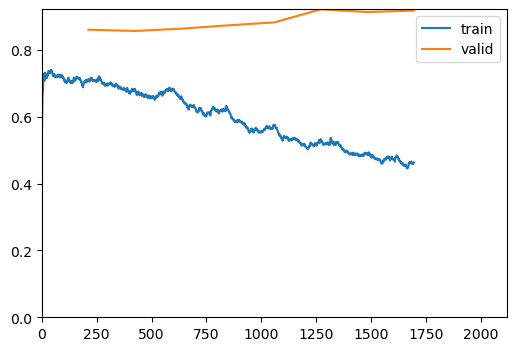

Epoch 2: reducing lr to 0.0002
Epoch 4: reducing lr to 0.00016234913078995263
Epoch 5: reducing lr to 0.00012225240438725783
Epoch 6: reducing lr to 7.774839561274215e-05
Epoch 7: early stopping
Epoch 7: reducing lr to 3.76516692100474e-05


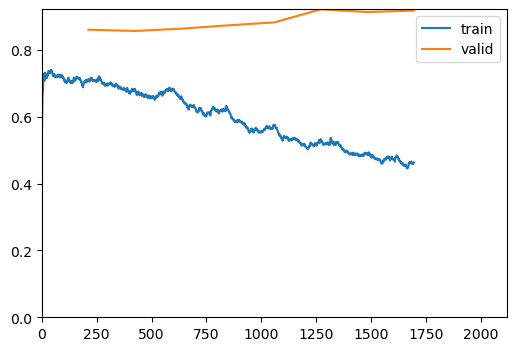

In [49]:

learn_clas.unfreeze()
learn_clas.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [50]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_clas)

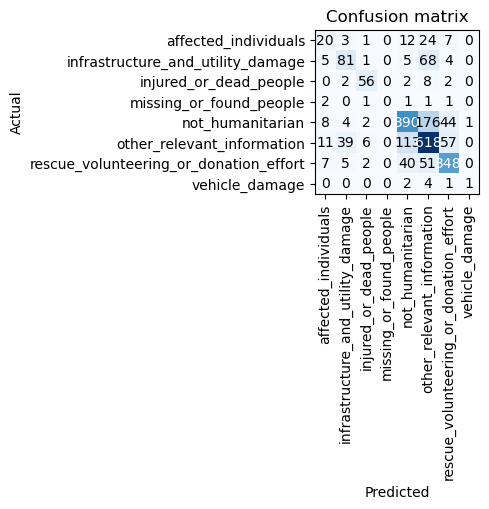

In [51]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [52]:
#making predictions on dev set to use it for classification report
preds,y,losses = learn_clas.get_preds(ds_type = DatasetType.Valid,with_loss=True)

In [53]:
y_preds = preds.argmax(1)

In [58]:
target_names = ['affected_individuals',
 'infrastructure_and_utility_damage',
 'not_humanitarian',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort',
 'missing_or_found_persons',
 'vehicle_or_property_damage',
 'injured_or_deceased_individuals']

In [59]:
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.30      0.24      0.27        67
     infrastructure_and_utility_damage       0.53      0.42      0.47       164
                      not_humanitarian       0.91      0.71      0.80        70
            other_relevant_information       0.00      0.00      0.00         6
rescue_volunteering_or_donation_effort       0.67      0.63      0.65       625
              missing_or_found_persons       0.66      0.71      0.69       844
            vehicle_or_property_damage       0.68      0.76      0.72       454
       injured_or_deceased_individuals       0.00      0.00      0.00         7

                              accuracy                           0.66      2237
                             macro avg       0.47      0.43      0.45      2237
                          weighted avg       0.65      0.66      0.65      2237



e:\notebooks\MultimodalTweetsClassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
learn_clas.validate(data_clas.test_dl,metrics=[accuracy,Precision1(average='macro'),Precision1(average='weighted'),
                                                           Recall(average='macro'),Recall(average='weighted'),
                                                           FBeta(average='macro',beta=1),FBeta(average='weighted',beta=1)])

[0.9535488,
 tensor(0.6594),
 tensor(0.4699),
 tensor(0.6526),
 tensor(0.4345),
 tensor(0.6594),
 tensor(0.4490),
 tensor(0.6541)]

In [61]:
#making predictions on test set to use it for classification report
preds,y,losses = learn_clas.get_preds(ds_type = DatasetType.Test,with_loss=True)
y_preds = preds.argmax(1)
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.30      0.24      0.27        67
     infrastructure_and_utility_damage       0.53      0.42      0.47       164
                      not_humanitarian       0.91      0.71      0.80        70
            other_relevant_information       0.00      0.00      0.00         6
rescue_volunteering_or_donation_effort       0.67      0.63      0.65       625
              missing_or_found_persons       0.66      0.71      0.69       844
            vehicle_or_property_damage       0.68      0.76      0.72       454
       injured_or_deceased_individuals       0.00      0.00      0.00         7

                              accuracy                           0.66      2237
                             macro avg       0.47      0.43      0.45      2237
                          weighted avg       0.65      0.66      0.65      2237



e:\notebooks\MultimodalTweetsClassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


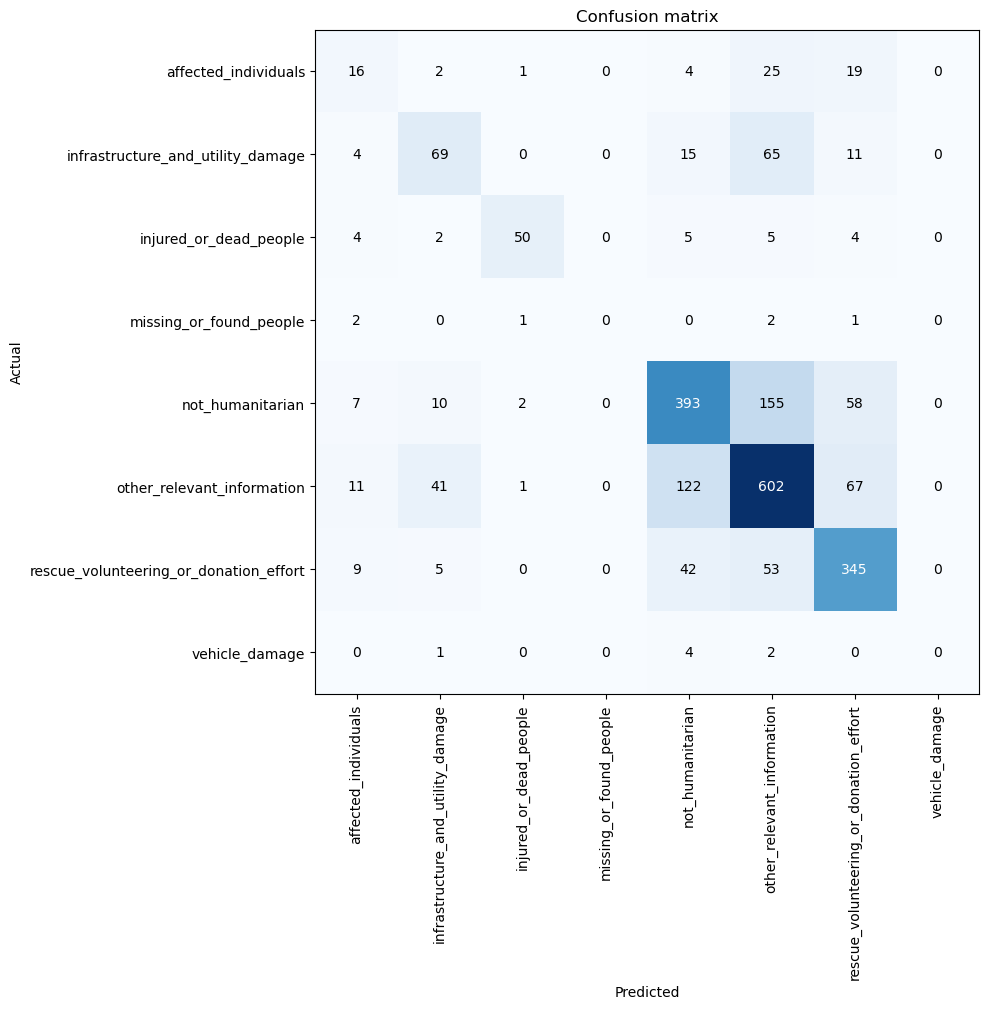

In [ ]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_clas,ds_type=DatasetType.Test)
# interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

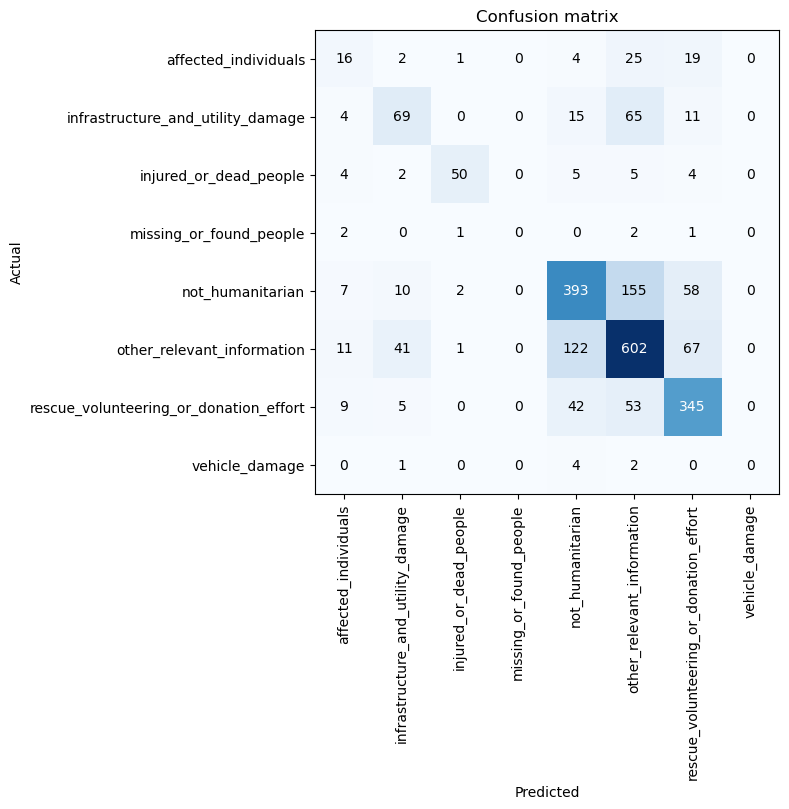

In [66]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)

In [63]:
learn_clas.save("Humanitarian_text_only")